# 5. Toy dataset for boosting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
from IPython.display import Image
import pydotplus

In [3]:
from sklearn.utils import resample
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## Part A

In [4]:
data = np.loadtxt('data3.txt')

X = data[:, [0,1]]
y = data[:, 2] 

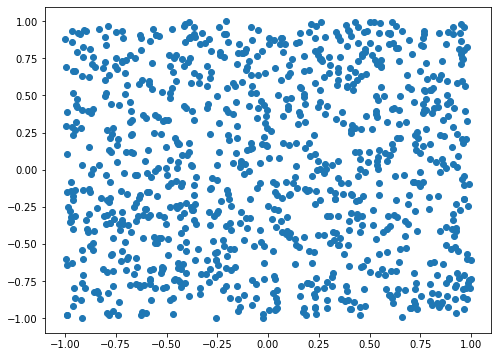

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

## Part B

In [6]:
clf = AdaBoostClassifier(n_estimators=6, random_state=42)
clf.fit(X, y)

AdaBoostClassifier(n_estimators=6, random_state=42)

In [7]:
clf

AdaBoostClassifier(n_estimators=6, random_state=42)

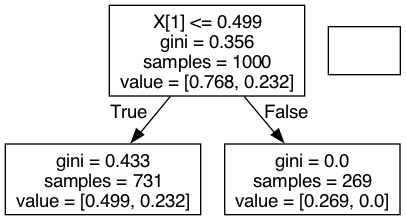

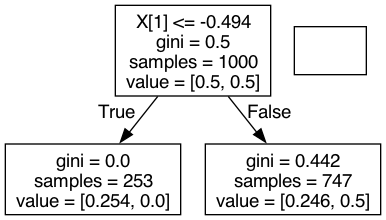

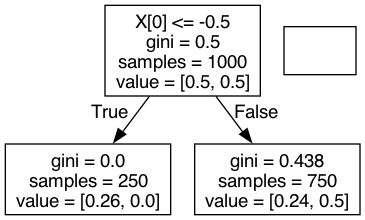

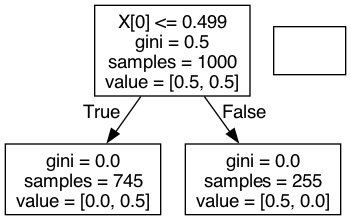

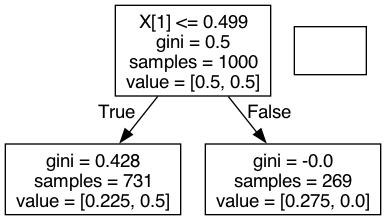

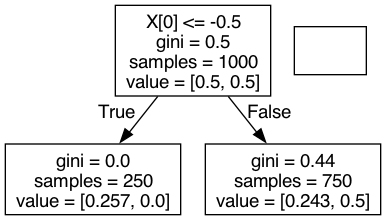

In [8]:
for i in clf.estimators_:
    dot_data = export_graphviz(i)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

## Part C

In [9]:
staged_score = clf.staged_score(X, y)
for i in staged_score:
    print(i)

0.768
0.768
0.882
1.0
1.0
1.0


# Credit card fraud

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('creditcard.csv')
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Part A

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There might be issues as there are not that many fraudulent transations

## Part B

In [13]:
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

## Part C

In [14]:
df_downsampled = df_downsampled.sample(frac=1).reset_index(drop=True)

In [15]:
df_downsampled

Time        V1        V2         V3        V4        V5        V6  \
0     31277.0  1.246291 -0.142498   0.194911 -0.040057 -0.433025 -0.636238   
1    102489.0 -2.296987  4.064043  -5.957706  4.680008 -2.080938 -1.463272   
2    116067.0  0.949241  1.333519  -4.855402  1.835006 -1.053245 -2.562826   
3     79243.0  1.109766  0.190480   0.559290  1.223969 -0.483493 -0.749011   
4     41204.0 -8.440284  6.147653 -11.683706  6.702780 -8.155839 -3.716264   
..        ...       ...       ...        ...       ...       ...       ...   
979   55781.0 -0.901302 -0.915673   0.977013 -2.674762  0.397624 -0.633285   
980  153875.0 -0.613696  3.698772  -5.534941  5.620486  1.649263 -2.335145   
981  138192.0 -0.401154  0.834849  -0.893418 -1.218327  2.986716  3.794359   
982    8808.0 -4.617217  1.695694  -3.114372  4.328199 -1.873257 -0.989908   
983    4079.0 -0.804507 -0.217345   1.203681 -1.450968  0.760603 -1.675161   

            V7        V8        V9  ...       V21       V22       V23  \
0    -0.092514 -0.105182  0.388818  ... -0.364734 -1.206386  0.093577   
1    -4.490847  1.029246 -1.593249  ...  1.089084  0.975398 -0.625530   
2    -2.286986  0.260906 -0.895366  ...  0.306598 -0.854627  0.101177   
3     0.069215 -0.086898  0.065692  ...  0.144309  0.430202 -0.033827   
4   -12.407313  5.626571 -6.232161  ...  2.192855 -0.282597  0.008068   
..         ...       ...       ...  ...       ...       ...       ...   
979  -0.141093  0.056730 -2.797985  ... -0.423151 -1.331625 -0.065983   
980  -0.907188  0.706362 -3.747646  ...  0.319261 -0.471379 -0.075890   
981   0.176695 -0.115394 -0.158806  ...  0.495044 -0.789651  0.131006   
982  -4.577265  0.472216  0.472017  ...  0.481830  0.146023  0.117039   
983   0.591709 -0.692488 -0.234786  ...  0.072198  0.478532 -0.102683   

          V24       V25       V26       V27       V28  Amount  Class  
0   -0.330802  0.047888  0.717876 -0.087700  0.010503   45.89      0  
1   -0.535181  0.247435  0.160400  0.969582  0.335041  104.00      1  
2   -0.281497  0.024444 -0.107944  0.625289  0.315677   65.00      1  
3    0.602232  0.514237 -0.300895  0.029836  0.027280   28.71      0  
4    0.403858 -0.018788  0.522722  0.792691  0.067790   30.26      1  
..        ...       ...       ...       ...       ...     ...    ...  
979 -0.956855  0.476024 -0.474391 -0.032105  0.046085   49.96      0  
980 -0.667909 -0.642848  0.070600  0.488410  0.292345    0.00      1  
981  0.697099 -0.727753  0.298743  0.148505  0.018100    2.68      0  
982 -0.217565 -0.138776 -0.424453 -1.002041  0.890780    1.10      1  
983  0.385930  0.625795 -0.317031 -0.370258 -0.164679   15.00      0  

[984 rows x 31 columns]

In [16]:
y = df_downsampled['Class']

In [17]:
X = df_downsampled.drop(['Class'], axis=1)

In [18]:
decision_tree_clf = DecisionTreeClassifier(random_state=42).fit(X,y)
boosted_decision_stumps_clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=42).fit(X, y)
random_forest_clf = RandomForestClassifier(random_state=42).fit(X,y)

### Cross validation 

#### Decision tree

In [19]:
y_pred = cross_val_predict(decision_tree_clf, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
cm

array([[448,  44],
       [ 45, 447]])

#### Boosted decision stumps

In [20]:
y_pred = cross_val_predict(boosted_decision_stumps_clf, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
cm

array([[479,  13],
       [ 47, 445]])

#### Random Forest

In [21]:
y_pred = cross_val_predict(random_forest_clf, X, y, cv=5)
cm = confusion_matrix(y, y_pred)
cm

array([[482,  10],
       [ 49, 443]])